In [1]:
import pandas as pd

# Load the Titanic datasets
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

# Display the first few rows of the training dataset
print(train_data.head())

# Get information about the dataset (data types, null values, etc.)
train_data.info()

# Summary statistics
print(train_data.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [2]:
# Check for missing values
print(train_data.isnull().sum())

# Get information about data types and columns
print(train_data.info())

# Summary statistics for numerical features
print(train_data.describe())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Non

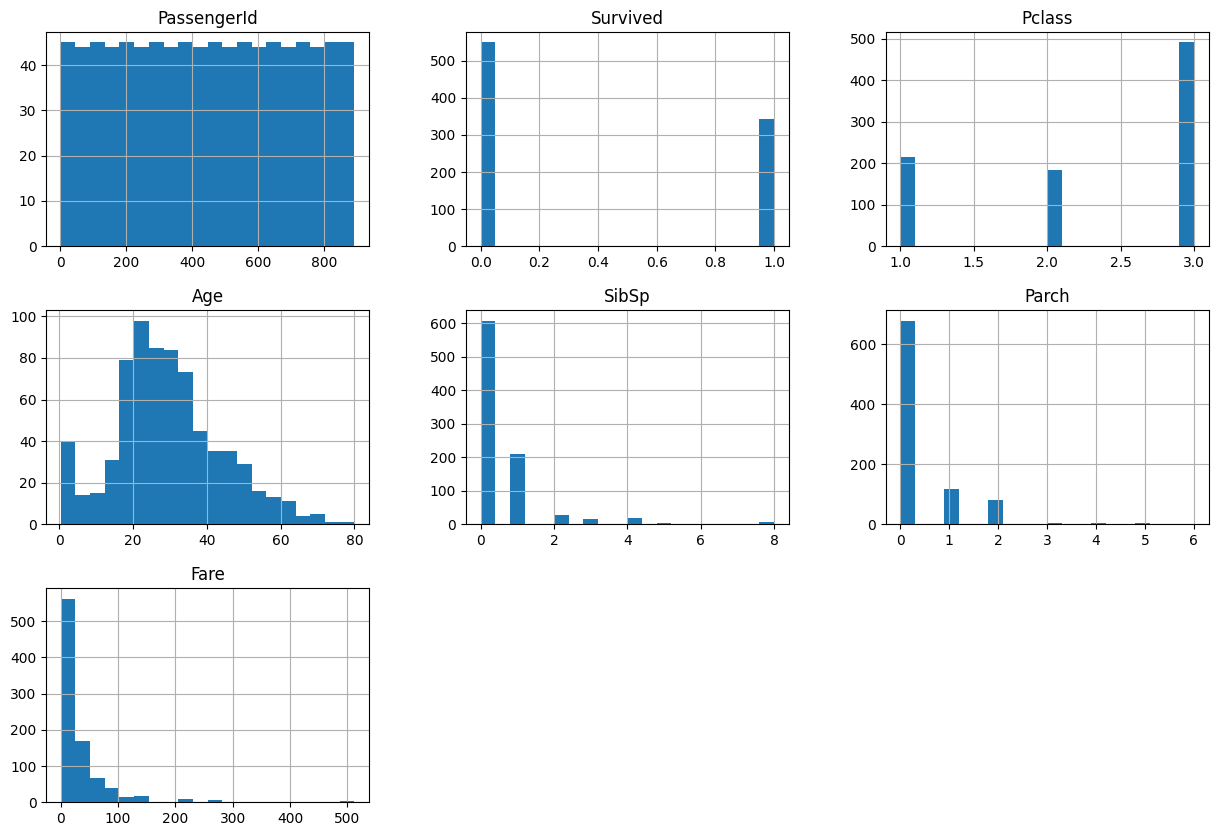

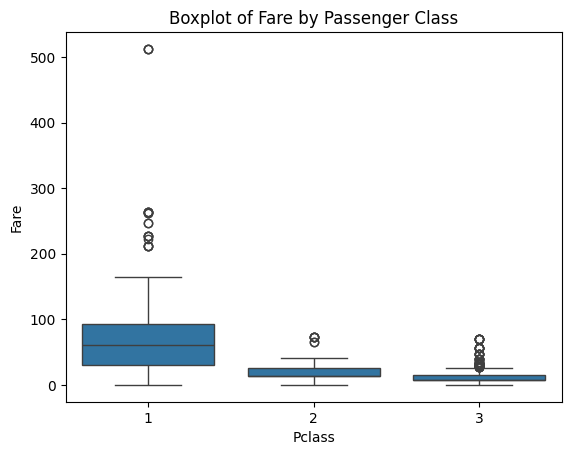

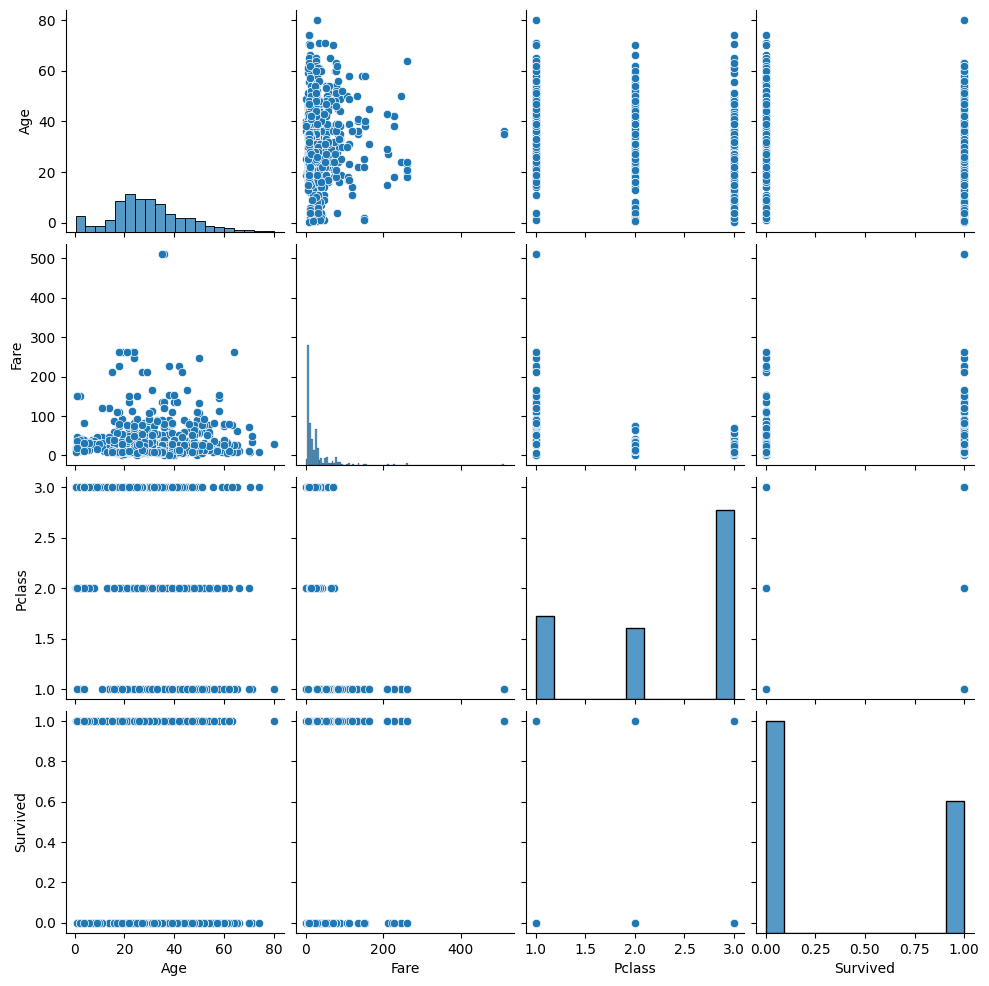

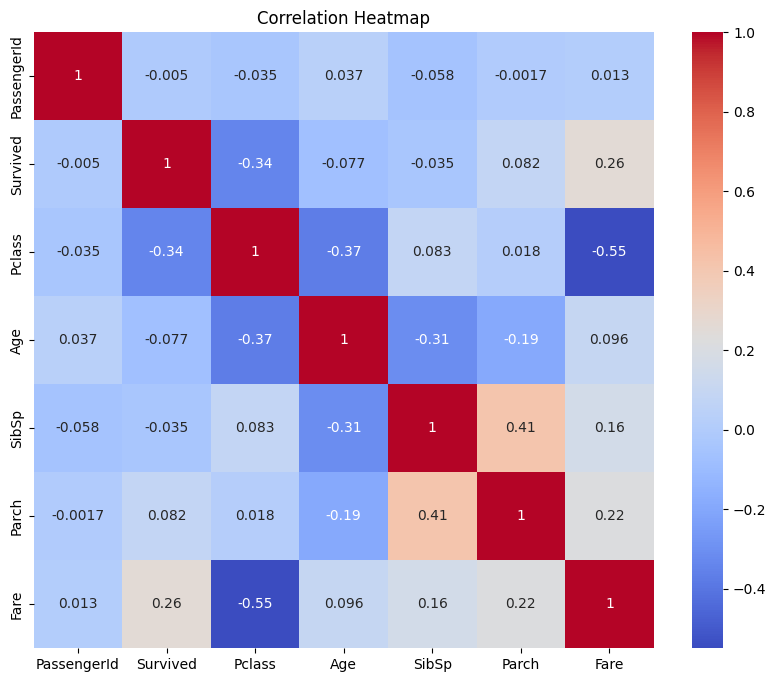

In [4]:

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical features for correlation
numerical_features = train_data.select_dtypes(include=['number'])

# Histogram for numerical features
numerical_features.hist(bins=20, figsize=(15, 10))
plt.show()

# Boxplot for 'Fare' by 'Pclass'
sns.boxplot(x='Pclass', y='Fare', data=train_data)
plt.title('Boxplot of Fare by Passenger Class')
plt.show()

# Pairplot for numerical features
sns.pairplot(train_data[['Age', 'Fare', 'Pclass', 'Survived']])
plt.show()

# Correlation heatmap using only numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm') # Changed to use numerical_features
plt.title('Correlation Heatmap')
plt.show()

In [5]:
# Check for missing values
print(train_data.isnull().sum())

# Fill missing values for 'Age' with the median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Drop rows with missing values in 'Embarked'
train_data.dropna(subset=['Embarked'], inplace=True)

# Fill missing values in 'Fare' (if any) in the test data with the median
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<ipython-input-5-8ead1a323a44>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
<ipython-input-5-8ead1a323a44>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [6]:
# Convert 'Sex' and 'Embarked' to numeric values using one-hot encoding
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

# Ensure test data has the same columns as the train data
missing_cols = set(train_data.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define the feature variables (X) and target variable (y)
X = train_data.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])
y = train_data['Survived']

# Split the training data into train and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on validation set
y_pred = logreg.predict(X_val)


Accuracy: 0.7808988764044944
Precision: 0.6923076923076923
Recall: 0.782608695652174
F1-Score: 0.7346938775510204
ROC-AUC: 0.8515489961441298


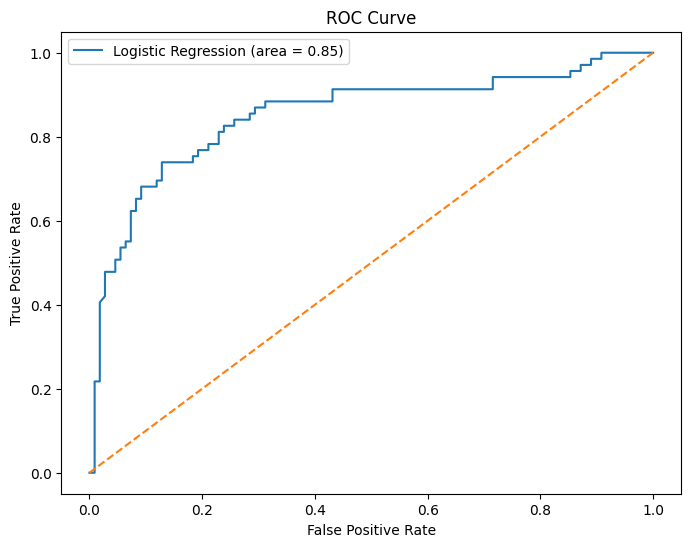

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Evaluate model performance
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, logreg.predict_proba(X_val)[:, 1])

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'ROC-AUC: {roc_auc}')

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, logreg.predict_proba(X_val)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [9]:
# Get the coefficients of the model
coefficients = pd.DataFrame(logreg.coef_[0], X.columns, columns=['Coefficient'])
print(coefficients)


            Coefficient
Pclass        -1.122447
Age           -0.043270
SibSp         -0.376137
Parch         -0.052926
Fare           0.001748
Sex_male      -2.631325
Embarked_Q    -0.065331
Embarked_S    -0.482259


In [11]:
import pickle

# Save the trained model to a file
with open('logreg_model.pkl', 'wb') as model_file:
    pickle.dump(logreg, model_file)
